In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from pylab import *
import xarray as xr
import pdb
from sklearn.metrics import r2_score
from scipy.stats import linregress
from scipy import stats
from shapely.geometry.polygon import LinearRing
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
from cartopy.feature import ShapelyFeature
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LinearSegmentedColormap

In [2]:
def plot(data,zondat,datmean,ring,linestyle, suptitle):
    fig = plt.figure(figsize=(9,9)) #16,8
    gs = gridspec.GridSpec(8,3, left=0.05, right=0.975, hspace=0.1, wspace=0.13, top=0.9, bottom=0.1, 
                           height_ratios=[1,0.1,0.35,1,0.2,0.1,0.4,1])

    ax = plt.subplot(gs[0,:],projection= ccrs.PlateCarree(central_longitude=180))
    im = plt.contourf(data['longitude'],data['latitude'], data['tcwv'][len(np.arange(-9,0.001,1/24))], 
                      cmap='bwr', transform = ccrs.PlateCarree(), extend = 'both', 
                      levels = np.arange(-5,5.01,0.5))
    ax.add_feature(cfeature.COASTLINE)
    ax.add_geometries([ring], ccrs.PlateCarree(), facecolor='none', edgecolor='k', 
                      linewidth=2.5, linestyle = '--')
    plt.title('(a)', loc = 'left')
    gl = ax.gridlines(crs = ccrs.PlateCarree(), draw_labels = True, 
                      linewidth = 1, color='k', alpha = 0.5, linestyle = '--')
    gl.xlocator = mticker.FixedLocator([120, 140, 160, 180, -160, -140, -120, -100]) ;gl.xlabels_bottom = False
    gl.ylocator = mticker.FixedLocator([-10, 0, 10])

    ax = plt.subplot(gs[1,:])
    cbar = plt.colorbar(im,cax=ax,orientation='horizontal',shrink = 0.4, ticks = np.arange(-5,5.01,0.5))
    cbar.set_label('TCWV anomaly (mm)', fontsize = 12)


    ax = plt.subplot(gs[3,:])
    im1 = plt.contourf(np.arange(9,-9.01,-1/24),np.arange(20,-20.01,-0.25), np.array(zondat['tcwv'].T), 
                       cmap='bwr', extend = 'both', levels = np.arange(-3.5,3.51,0.5))
    plt.title('(b)', loc = 'left')
    plt.yticks([-20,-10,0,10,20])
    plt.xlim(-9,9)
    plt.xticks(np.arange(-9,9.01,1.5))

    ax = plt.subplot(gs[5,:])
    cbar1 = plt.colorbar(im1,cax=ax,orientation='horizontal',shrink = 0.4, ticks = np.arange(-3.5,3.51,0.5))
    cbar1.set_label('TCWV anomaly (mm)', fontsize = 12)

    ax = plt.subplot(gs[7,:])
    plt.plot(np.arange(9,-9.001,-1/24), datmean.tcwv, color = 'blue')
    plt.xticks(np.arange(-9,9.001,1.5))
    plt.ylabel('TCWV anomaly (mm)')
    plt.xlabel('Days')
    plt.title('(c)', loc = 'left')
    plt.suptitle(suptitle, fontweight = 'bold', fontsize = 12)

/Users/Casi94/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:336: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '


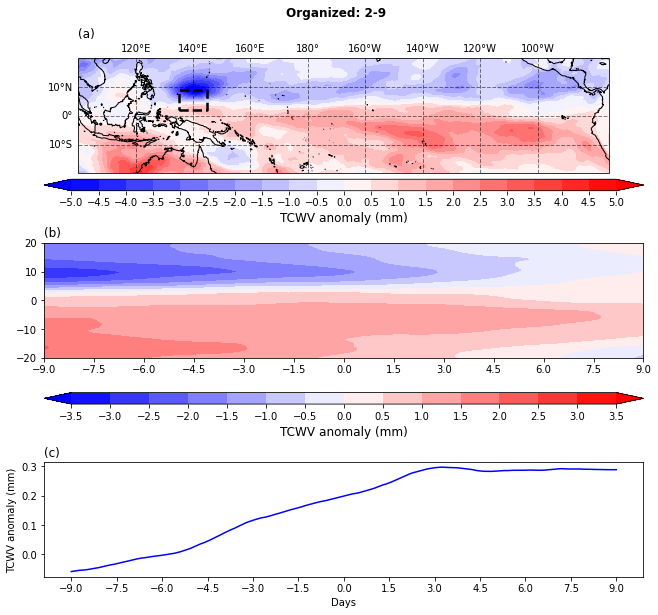

/Users/Casi94/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:336: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '


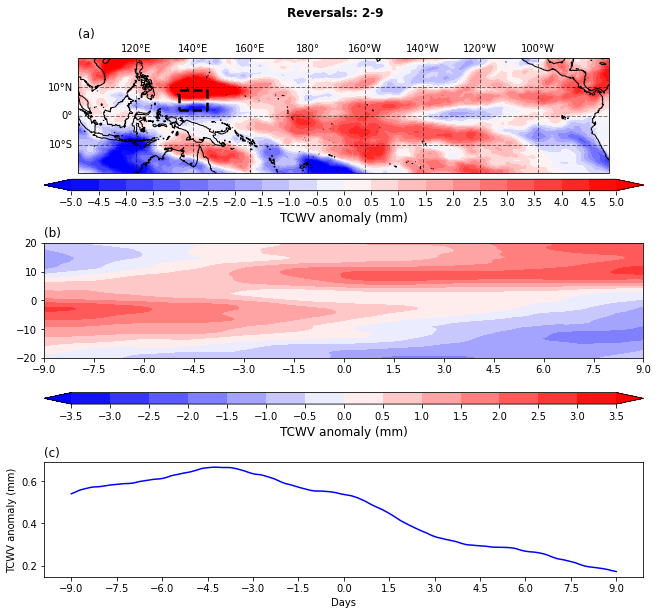

/Users/Casi94/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:336: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '


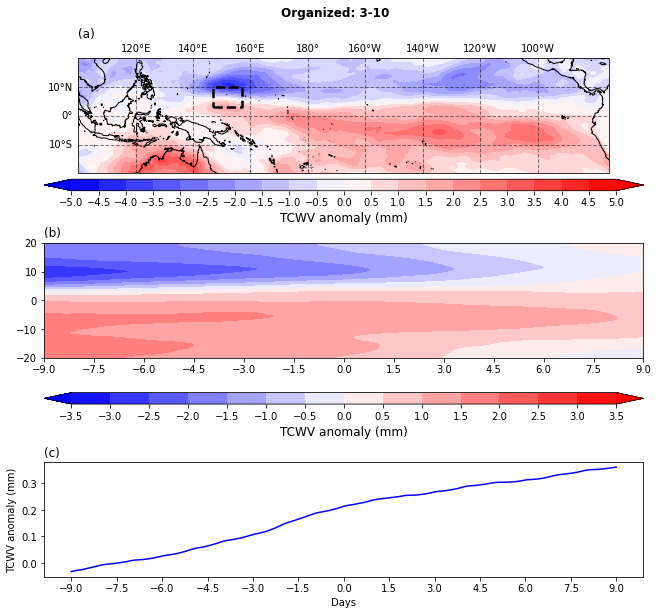

/Users/Casi94/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:336: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '


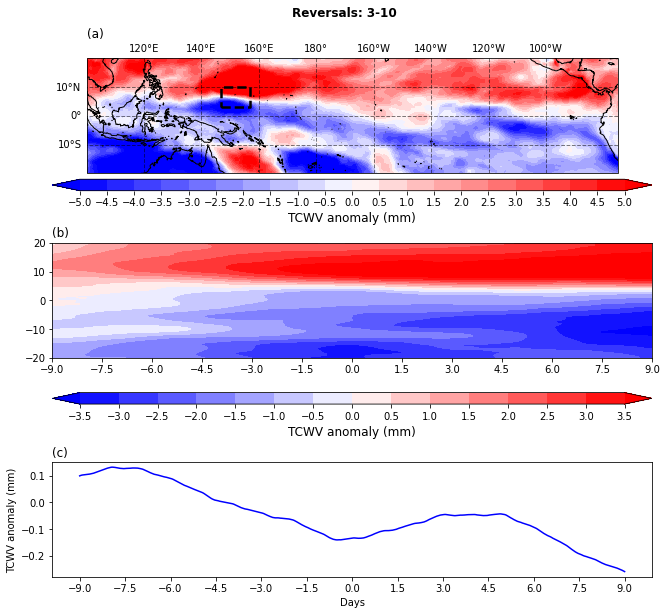

/Users/Casi94/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:336: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '


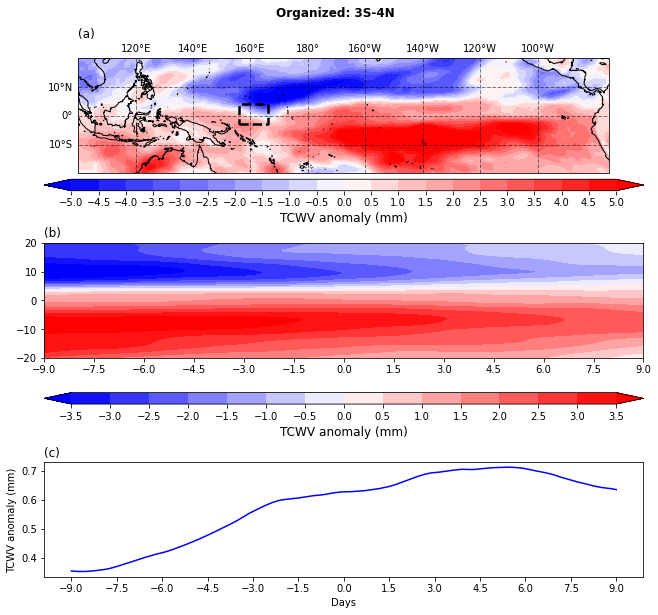

/Users/Casi94/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:336: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '


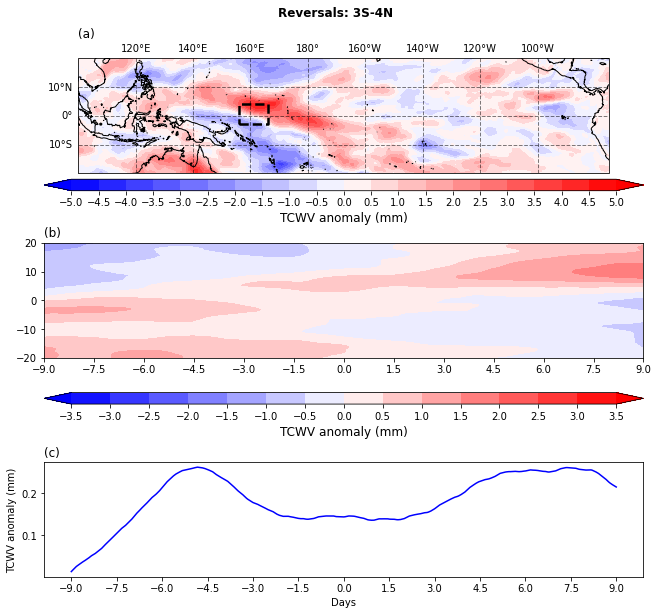

In [3]:
latitud = ['2-9','3-10','3S-4N']
longitud = ['135-145','147-157','156-166']

for i,lat in enumerate(latitud):
    path = '/Users/Casi94/Documents/PhD/Thesis/NN_real/Area_'+lat+'_'+longitud[i]+'_ERA5/'
    org = xr.open_dataset(path+'TCWV_full_org_composite_'+lat+'.nc')
    rev = xr.open_dataset(path+'TCWV_full_rev_composite_'+lat+'.nc')
    zonorg = org.mean(dim='longitude')
    zonrev = rev.mean(dim='longitude')
    orgmean = org.mean(dim=['longitude','latitude'])
    revmean = rev.mean(dim=['longitude','latitude'])
    ### Study areas!
    if lat == '2-9':
        a_lat = [2,2,9,9]
        a_lon = [135,145,145,135]
        ring = LinearRing(list(zip(a_lon, a_lat)))
        linestyle = '--'
    elif lat == '3-10':
        a_lat = [3,3,10,10]
        a_lon = [147,157,157,147]
        ring = LinearRing(list(zip(a_lon, a_lat)))
        linestyle = '-'
    elif lat == '3S-4N':
        a_lat = [-3,-3,4,4]
        a_lon = [156,166,166,156]
        ring = LinearRing(list(zip(a_lon, a_lat)))
        linestyle = '-.'
    plot(org, zonorg, orgmean, ring, linestyle, 'Organized: '+lat)
    plt.show()
    plt.close()
    plot(rev, zonrev, revmean, ring, linestyle, 'Reversals: '+lat)
    plt.show()
    plt.close()

### Slope

In [89]:
latitude = '2-9'
longitude = '135-145'
path = '/Users/Casi94/Documents/PhD/Thesis/NN_real/Area_'+latitude+'_'+longitude+'_ERA5/'
### Slopes
slopes = pd.read_csv('/Users/Casi94/Documents/PhD/Thesis/NN_real/Area_2-9_135-145_ERA5/Slopes_data_ERA5.csv', 
                     parse_dates = True, index_col = 0)
slo_3 =pd.read_csv('/Users/Casi94/Documents/PhD/Thesis/NN_real/Area_3-10_147-157_ERA5/Slopes_data_ERA5.csv', 
                     parse_dates = True, index_col = 0)
slo_3s = pd.read_csv('/Users/Casi94/Documents/PhD/Thesis/NN_real/Area_3S-4N_156-166_ERA5/Slopes_data_ERA5.csv', 
                     parse_dates = True, index_col = 0)
slo_195 = pd.read_csv('/Users/Casi94/Documents/PhD/Thesis/NN_real/Area_2-9_195-205_ERA5/Slopes_data_2-9_195-205_ERA5.csv', 
                     parse_dates = True, index_col = 0)
slo_245 = pd.read_csv('/Users/Casi94/Documents/PhD/Thesis/NN_real/Area_2-9_245-255_ERA5/Slopes_data_2-9_245-255_ERA5.csv', 
                     parse_dates = True, index_col = 0)
### TCWV
tcwv_all = xr.open_dataset('/Users/Casi94/Documents/PhD/Thesis/NN_real/TCWV_fldmean_all.nc')
tcwv_all = tcwv_all.tcwv.loc['2016-01-01':'2019-12-31']
### Specific humidity
sp_all = xr.open_dataset('/Users/Casi94/Documents/PhD/Thesis/NN_real/specific_humidity_fldmean_all.nc')
sp_sfc_all = xr.open_dataset('/Users/Casi94/Documents/PhD/Thesis/NN_real/specific_humidity_sfc_fldmean_all.nc')
sp_600 = sp_all.q[:,0,0,0]
sp_500 = sp_all.q[:,1,0,0]
sp_400 = sp_all.q[:,2,0,0]
sp_900 = sp_sfc_all.q[:,0,0,0]
sp_800 = sp_sfc_all.q[:,1,0,0]
sp_700 = sp_sfc_all.q[:,2,0,0]

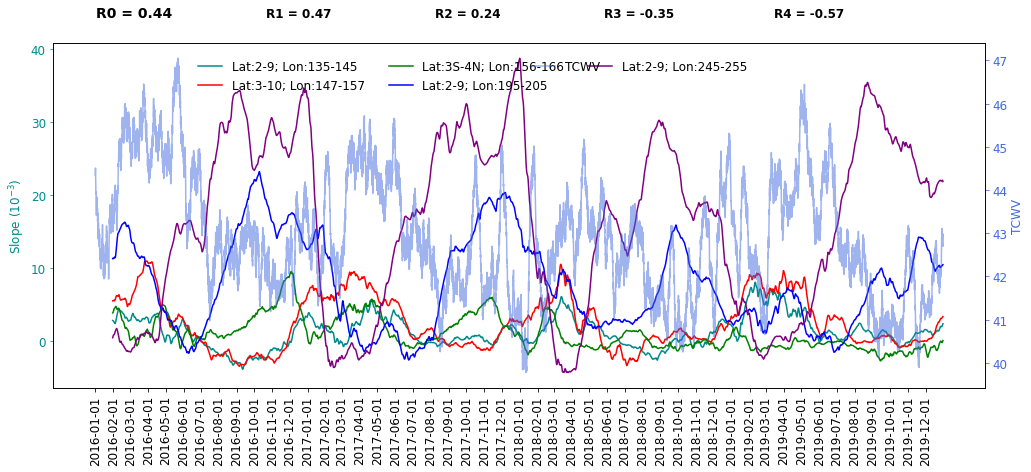

In [5]:
date = [d.strftime('%Y-%m') for d in pd.date_range('2016-01', '2020-01', freq = '1m')]
jump = 30
fig = plt.figure(figsize = (14,6))
gs = gridspec.GridSpec(1,1, left=0.05, right=0.975, hspace=0.45, wspace=0.4, top=0.9, bottom=0.1)
ax=subplot(gs[0])
ax.plot(slopes.index.tolist(), np.array(slopes.Slope.rolling(jump*24).mean())*1e3, 
        label = 'Lat:2-9; Lon:135-145', color = 'darkcyan')
plt.plot(slopes.index.tolist(), np.array(slo_3.Slope.rolling(jump*24).mean())*1e3, 
        label = 'Lat:3-10; Lon:147-157', color = 'red')
plt.plot(slopes.index.tolist(), np.array(slo_3s.Slope.rolling(jump*24).mean())*1e3, 
        label = 'Lat:3S-4N; Lon:156-166', color = 'green')
plt.plot(slopes.index.tolist(), np.array(slo_195.Slope.rolling(jump*24).mean())*1e3, 
        label = 'Lat:2-9; Lon:195-205', color = 'blue')
plt.plot(slopes.index.tolist(), np.array(slo_245.Slope.rolling(jump*24).mean())*1e3, 
        label = 'Lat:2-9; Lon:245-255', color = 'purple')

plt.legend(frameon=False, loc = 'upper center', bbox_to_anchor = (0.45,0.98), fontsize = 12, ncol = 3)
plt.xticks(date, rotation = 90, fontsize = 12)
plt.ylabel('Slope (10$^{-3}$)', fontsize = 12, color = 'darkcyan')
plt.yticks(fontsize = 12)
ax.yaxis.label.set_color('darkcyan')
ax.tick_params(axis='y', colors = 'darkcyan')
ax2 = ax.twinx()
ax2.plot(slopes.index.tolist(), tcwv_all[0:35040,0,0], label = 'TCWV', color = 'royalblue', alpha = 0.5)
plt.legend(frameon = False, bbox_to_anchor = (0.55,0.98), loc = 'upper center', fontsize = 12)
plt.xticks(date, rotation = 90, fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('TCWV', fontsize = 12, color = 'royalblue')
ax2.yaxis.label.set_color('royalblue')
ax2.tick_params(axis='y', colors = 'royalblue')
plt.text(slopes.index.tolist()[-35000],48,
         'R0 = '+str(np.round(stats.spearmanr(tcwv_all[jump*24-1:35040,0,0]/tcwv_all.std(),
          np.array((slopes.Slope.rolling(jump*24).mean()).dropna()))[0],2)),
         fontsize = 14, fontweight = 'bold')
plt.text(slopes.index.tolist()[-28000],48,
         'R1 = '+str(np.round(stats.spearmanr(tcwv_all[jump*24-1:35040,0,0]/tcwv_all.std(),
          np.array((slo_3.Slope.rolling(jump*24).mean()).dropna()))[0],2)),
         fontsize = 12, fontweight = 'bold')
plt.text(slopes.index.tolist()[-21000],48,
         'R2 = '+str(np.round(stats.spearmanr(tcwv_all[jump*24-1:35040,0,0]/tcwv_all.std(),
          np.array((slo_3s.Slope.rolling(jump*24).mean()).dropna()))[0],2)),
         fontsize = 12, fontweight = 'bold')
plt.text(slopes.index.tolist()[-14000],48,
         'R3 = '+str(np.round(stats.spearmanr(tcwv_all[jump*24-1:35040,0,0]/tcwv_all.std(),
          np.array((slo_195.Slope.rolling(jump*24).mean()).dropna()))[0],2)),
         fontsize = 12, fontweight = 'bold')
plt.text(slopes.index.tolist()[-7000],48,
         'R4 = '+str(np.round(stats.spearmanr(tcwv_all[jump*24-1:35040,0,0]/tcwv_all.std(),
          np.array((slo_245.Slope.rolling(jump*24).mean()).dropna()))[0],2)),
         fontsize = 12, fontweight = 'bold')
plt.show()

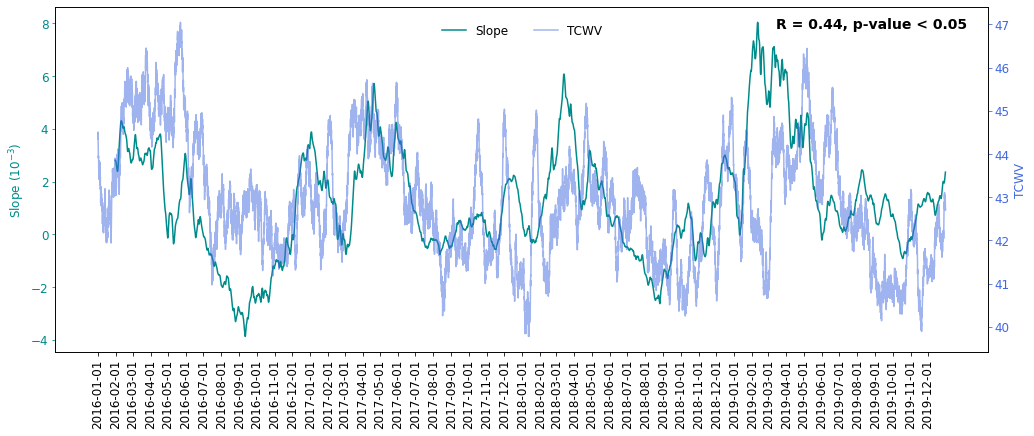

In [6]:
date = [d.strftime('%Y-%m') for d in pd.date_range('2016-01', '2020-01', freq = '1m')]
jump = 30
fig = plt.figure(figsize = (14,6))
gs = gridspec.GridSpec(1,1, left=0.05, right=0.975, hspace=0.45, wspace=0.4, top=0.9, bottom=0.1)
ax=subplot(gs[0])
ax.plot(slopes.index.tolist(), np.array(slopes.Slope.rolling(jump*24).mean())*1e3, 
        label = 'Slope', color = 'darkcyan')

plt.legend(frameon=False, loc = 'upper center', bbox_to_anchor = (0.45,0.98), fontsize = 12)
plt.xticks(date, rotation = 90, fontsize = 12)
plt.ylabel('Slope (10$^{-3}$)', fontsize = 12, color = 'darkcyan')
plt.yticks(fontsize = 12)
ax.yaxis.label.set_color('darkcyan')
ax.tick_params(axis='y', colors = 'darkcyan')
ax2 = ax.twinx()
ax2.plot(slopes.index.tolist(), tcwv_all[0:35040,0,0], label = 'TCWV', color = 'royalblue', alpha = 0.5)
plt.legend(frameon = False, bbox_to_anchor = (0.55,0.98), loc = 'upper center', fontsize = 12)
plt.xticks(date, rotation = 90, fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('TCWV', fontsize = 12, color = 'royalblue')
ax2.yaxis.label.set_color('royalblue')
ax2.tick_params(axis='y', colors = 'royalblue')
plt.text(slopes.index.tolist()[-7000],46.9,
         'R = '+str(np.round(stats.spearmanr(tcwv_all[jump*24-1:35040,0,0]/tcwv_all.std(),
          np.array((slopes.Slope.rolling(jump*24).mean()).dropna()))[0],2))+', p-value < 0.05',
         fontsize = 14, fontweight = 'bold')
plt.show()

Text(39.7, 8.2, 'R = 0.44, p-value < 0.05')

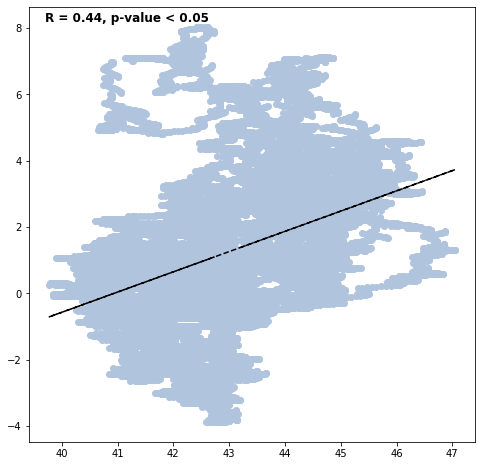

In [7]:
jump = 30
x = np.array(tcwv_all[jump*24-1:35040,0,0])
y = np.array(slopes.Slope.rolling(jump*24).mean().dropna())*1e3
coef = np.polyfit(x, y,1) 
poly1d_fn = np.poly1d(coef)
fig = plt.figure(figsize = (8,8))
plt.scatter(x,y, color = 'lightsteelblue')
plt.plot(x, poly1d_fn(x), '--k') #'--k'=black dashed line, 'yo' = yellow circle marker
plt.text(39.7,8.2,'R = '+str(np.round(stats.spearmanr(x,y)[0],2))+', p-value < 0.05', 
         fontsize = 12, fontweight = 'bold')

In [8]:
jump = 30
stats.pearsonr(tcwv_all[jump*24-1:35040,0,0]/tcwv_all.std(),
               np.array((slopes.Slope.rolling(jump*24).mean()/slopes.Slope.std()).dropna()))

(0.39077837770831814, 0.0)

In [9]:
np.round(stats.pearsonr(tcwv_all[jump*24-1:35040,0,0]/tcwv_all.std(),
               np.array((slopes.Slope.rolling(jump*24).mean()/slopes.Slope.std()).dropna()))[0],1)

0.4

In [10]:
jump = 30
stats.spearmanr(tcwv_all[jump*24-1:35040,0,0],
                np.array((slopes.Slope.rolling(jump*24).mean()/slopes.Slope.std()).dropna()))

SpearmanrResult(correlation=0.4408835108750621, pvalue=0.0)

In [11]:
jump = 30
stats.spearmanr(tcwv_all[jump*24-1:35040,0,0],
                np.array((slopes.Slope.rolling(jump*24).mean()).dropna()))

SpearmanrResult(correlation=0.4408835108750621, pvalue=0.0)

In [12]:
jump = 30
np.cov(tcwv_all[jump*24-1:35040,0,0],
       np.array((slopes.Slope.rolling(jump*24).mean()/slopes.Slope.std()).dropna()))

array([[1.87129907, 0.25949816],
       [0.25949816, 0.2356483 ]])

# 900 hPa

In [44]:
def plot_slope_region(slope,title, location_rx, location_ry, legend, jump):
    ax.plot(slope.index.tolist(), np.array(slope.Slope.rolling(jump*24).mean())*1e3, 
        label = 'Slope', color = 'darkcyan')
    if legend == True:
        plt.legend(frameon=False, loc = 'upper center', bbox_to_anchor = (0.45,1.15), fontsize = 14)
    plt.xticks(date, rotation = 90, fontsize = 12)
    plt.ylabel('Slope (10$^{-3}$)', fontsize = 12, color = 'darkcyan')
    plt.yticks(fontsize = 12)
    ax.yaxis.label.set_color('darkcyan')
    ax.tick_params(axis='y', colors = 'darkcyan')
    ax2 = ax.twinx()
    ax2.plot(slope.index.tolist(), np.array(sp_900[0:35040]), label = 'TCWV', color = 'royalblue', alpha = 0.5)
    if legend == True:
        plt.legend(frameon = False, bbox_to_anchor = (0.55,1.15), loc = 'upper center', fontsize = 14)
    plt.xticks(date, rotation = 90, fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.ylabel('q (900 hPa)', fontsize = 12, color = 'royalblue')
    ax2.yaxis.label.set_color('royalblue')
    ax2.tick_params(axis='y', colors = 'royalblue')
    plt.title(title, loc = 'left', fontsize = 14)
    plt.text(slope.index.tolist()[location_rx],location_ry,
             'R = '+str(np.round(stats.spearmanr(sp_900[jump*24-1:35040]/sp_900.std(),
              np.array((slope.Slope.rolling(jump*24).mean()).dropna()))[0],2)),
             fontsize = 14, fontweight = 'bold')

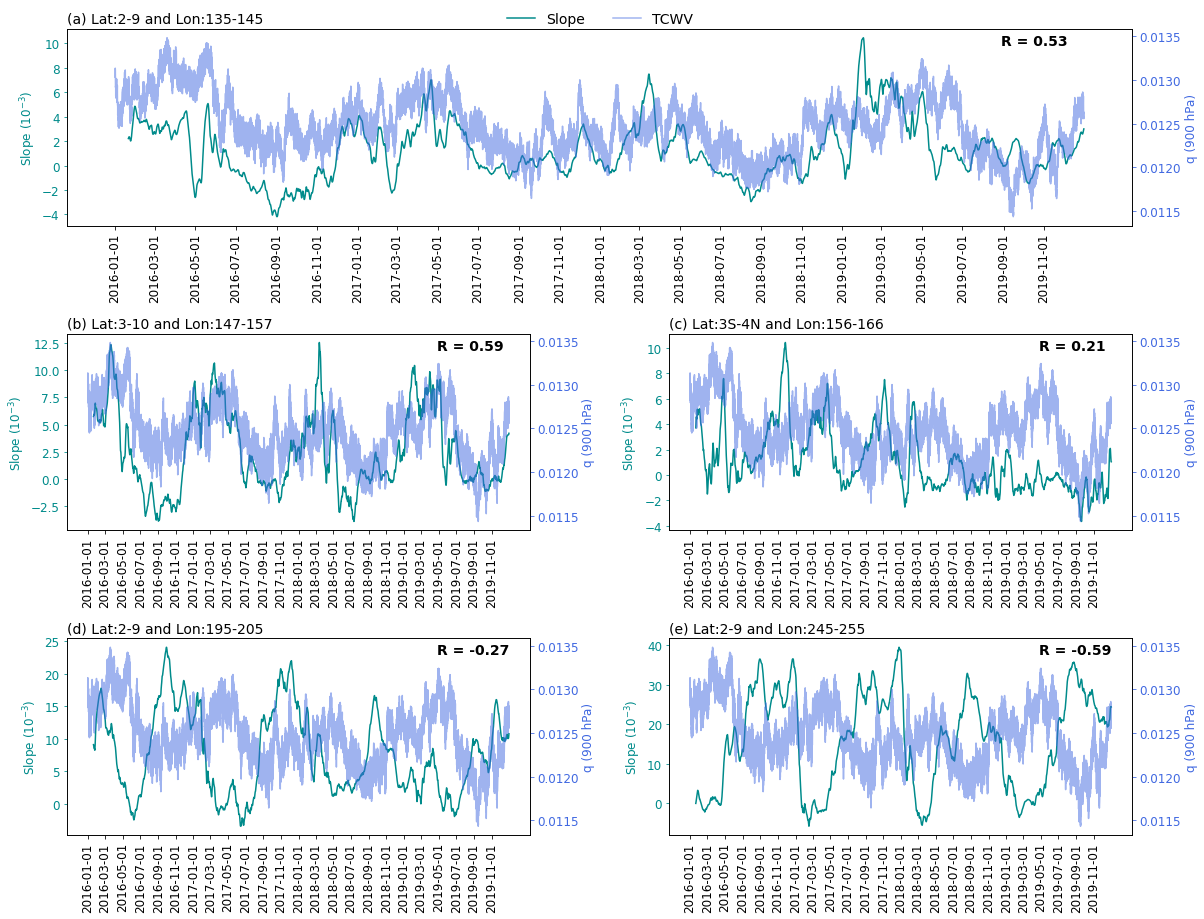

In [47]:
date = [d.strftime('%Y-%m') for d in pd.date_range('2016-01', '2020-01', freq = '2m')]
jump = 20
fig = plt.figure(figsize = (16,14))
gs = gridspec.GridSpec(5,2, left=0.05, right=0.975, hspace=0.35, wspace=0.3, top=0.9, bottom=0.1, 
                      height_ratios = [1,0.1,1,0.1,1])
#### Lat:2-9; Lon:135-145 
ax=subplot(gs[0,0:])
plot_slope_region(slopes,'(a) Lat:2-9 and Lon:135-145', -3000, 0.0134, True, jump)
ax=subplot(gs[2,0])
plot_slope_region(slo_3,'(b) Lat:3-10 and Lon:147-157', -6000, 0.0134, False, jump)
ax=subplot(gs[2,1])
plot_slope_region(slo_3s,'(c) Lat:3S-4N and Lon:156-166', -6000, 0.0134, False, jump)
ax=subplot(gs[4,0])
plot_slope_region(slo_195,'(d) Lat:2-9 and Lon:195-205', -6000, 0.0134, False, jump)
ax=subplot(gs[4,1])
plot_slope_region(slo_245,'(e) Lat:2-9 and Lon:245-255', -6000, 0.0134, False, jump)


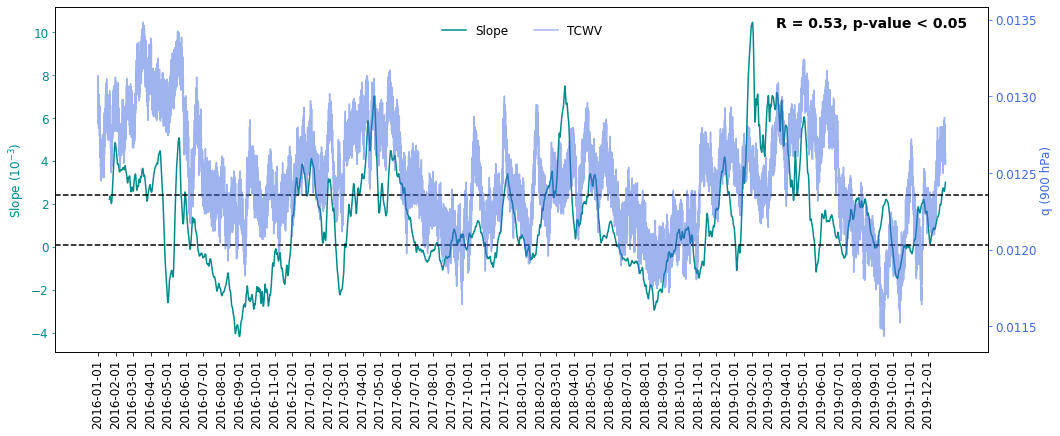

In [132]:
date = [d.strftime('%Y-%m') for d in pd.date_range('2016-01', '2020-01', freq = '1m')]
jump = 20
fig = plt.figure(figsize = (14,6))
gs = gridspec.GridSpec(1,1, left=0.05, right=0.975, hspace=0.45, wspace=0.4, top=0.9, bottom=0.1)
ax=subplot(gs[0])
ax.plot(slopes.index.tolist(), np.array(slopes.Slope.rolling(jump*24).mean())*1e3, 
        label = 'Slope', color = 'darkcyan')
plt.axhline(slopes.Slope.rolling(jump*24).mean().mean()*1e3 + 0.5*slopes.Slope.rolling(jump*24).mean().std()*1e3, 
            color = 'k', linestyle = '--')
plt.axhline(slopes.Slope.rolling(jump*24).mean().mean()*1e3 - 0.5*slopes.Slope.rolling(jump*24).mean().std()*1e3, 
            color = 'k', linestyle = '--')

plt.legend(frameon=False, loc = 'upper center', bbox_to_anchor = (0.45,0.98), fontsize = 12)
plt.xticks(date, rotation = 90, fontsize = 12)
plt.ylabel('Slope (10$^{-3}$)', fontsize = 12, color = 'darkcyan')
plt.yticks(fontsize = 12)
ax.yaxis.label.set_color('darkcyan')
ax.tick_params(axis='y', colors = 'darkcyan')
ax2 = ax.twinx()
ax2.plot(slopes.index.tolist(), np.array(sp_900[0:35040]), label = 'TCWV', color = 'royalblue', alpha = 0.5)
plt.legend(frameon = False, bbox_to_anchor = (0.55,0.98), loc = 'upper center', fontsize = 12)
plt.xticks(date, rotation = 90, fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('q (900 hPa)', fontsize = 12, color = 'royalblue')
ax2.yaxis.label.set_color('royalblue')
ax2.tick_params(axis='y', colors = 'royalblue')
plt.text(slopes.index.tolist()[-7000],0.01345,
         'R = '+str(np.round(stats.spearmanr(sp_900[jump*24-1:35040]/sp_900.std(),
          np.array((slopes.Slope.rolling(jump*24).mean()).dropna()))[0],2))+', p-value < 0.05',
         fontsize = 14, fontweight = 'bold')
plt.show()

# Boreal winter and Summer

## 135-145

Text(0.0, 1.0, '(b) Boreal Summer')

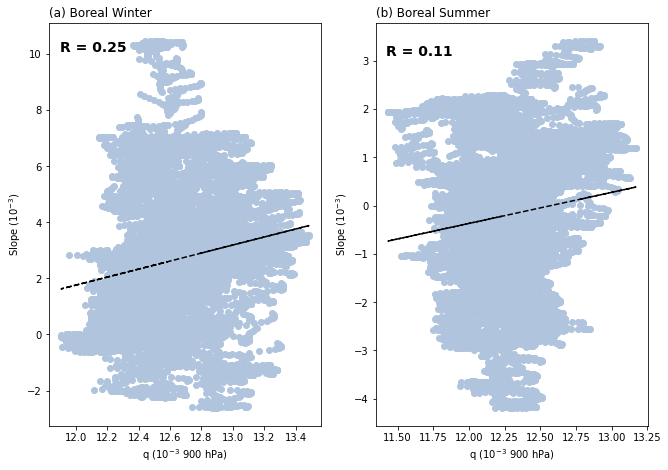

In [91]:
slo_roll = slopes.Slope.rolling(jump*24).mean().dropna()
slo_b_win = slo_roll[slo_roll.index.month.isin([12,1,2,3,4,5])]
sp_df_900 = sp_900[jump*24-1:35040].to_dataframe()
sp_900_b_win = sp_df_900[sp_df_900.index.month.isin([12,1,2,3,4,5])]

slo_b_sum = slo_roll[slo_roll.index.month.isin([6,7,8,9,10,11])]
sp_900_b_sum = sp_df_900[sp_df_900.index.month.isin([6,7,8,9,10,11])]

fig = plt.figure(figsize=(9,7)) #16,8
gs = gridspec.GridSpec(1,2, left=0.05, right=0.975, hspace=0.1, wspace=0.2, top=0.9, bottom=0.1, )

ax = plt.subplot(gs[0])
plt.scatter(sp_900_b_win.q*1e3, slo_b_win*1e3, color = 'lightsteelblue')
coef = np.polyfit(sp_900_b_win.q*1e3, slo_b_win*1e3,1) 
poly1d_fn = np.poly1d(coef)
plt.plot(sp_900_b_win.q*1e3, poly1d_fn(sp_900_b_win.q*1e3), '--k')
plt.text(11.9,10.1,'R = '+str(np.round(stats.spearmanr(sp_900_b_win.q.dropna(),
                                                       slo_b_win.dropna())[0],2)),
         fontsize = 14, fontweight = 'bold')
plt.xlabel('q (10$^{-3}$ 900 hPa)')
plt.ylabel('Slope (10$^{-3}$)')
plt.title('(a) Boreal Winter', loc = 'left')

ax = plt.subplot(gs[1])
plt.scatter(sp_900_b_sum.q*1e3, slo_b_sum*1e3, color = 'lightsteelblue')
coef = np.polyfit(sp_900_b_sum.q*1e3, slo_b_sum*1e3,1) 
poly1d_fn = np.poly1d(coef)
plt.plot(sp_900_b_sum.q*1e3, poly1d_fn(sp_900_b_sum.q*1e3), '--k')
plt.text(11.42,3.1,'R = '+str(np.round(stats.spearmanr(sp_900_b_sum.q.dropna(),
                                                       slo_b_sum.dropna())[0],2)),
         fontsize = 14, fontweight = 'bold')
plt.xlabel('q (10$^{-3}$ 900 hPa)')
plt.ylabel('Slope (10$^{-3}$)')
plt.title('(b) Boreal Summer', loc = 'left')

## 147-157

Text(0.0, 1.0, '(b) Boreal Summer')

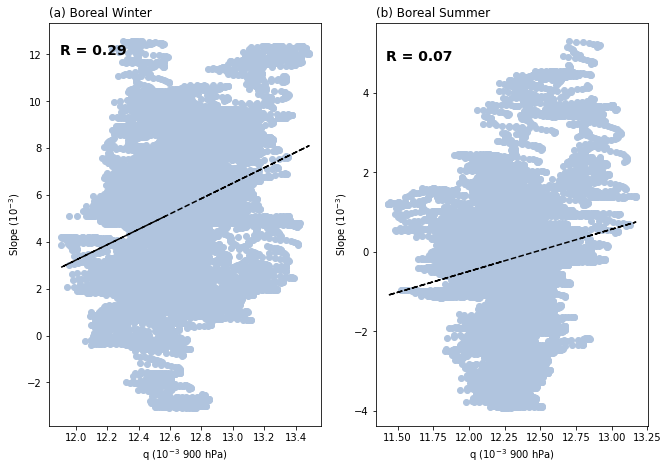

In [96]:
slo_roll = slo_3.Slope.rolling(jump*24).mean().dropna()
slo_b_win = slo_roll[slo_roll.index.month.isin([12,1,2,3,4,5])]
sp_df_900 = sp_900[jump*24-1:35040].to_dataframe()
sp_900_b_win = sp_df_900[sp_df_900.index.month.isin([12,1,2,3,4,5])]

slo_b_sum = slo_roll[slo_roll.index.month.isin([6,7,8,9,10,11])]
sp_900_b_sum = sp_df_900[sp_df_900.index.month.isin([6,7,8,9,10,11])]

fig = plt.figure(figsize=(9,7)) #16,8
gs = gridspec.GridSpec(1,2, left=0.05, right=0.975, hspace=0.1, wspace=0.2, top=0.9, bottom=0.1, )

ax = plt.subplot(gs[0])
plt.scatter(sp_900_b_win.q*1e3, slo_b_win*1e3, color = 'lightsteelblue')
coef = np.polyfit(sp_900_b_win.q*1e3, slo_b_win*1e3,1) 
poly1d_fn = np.poly1d(coef)
plt.plot(sp_900_b_win.q*1e3, poly1d_fn(sp_900_b_win.q*1e3), '--k')
plt.text(11.9,12,'R = '+str(np.round(stats.spearmanr(sp_900_b_win.q.dropna(),
                                                       slo_b_win.dropna())[0],2)),
         fontsize = 14, fontweight = 'bold')
plt.xlabel('q (10$^{-3}$ 900 hPa)')
plt.ylabel('Slope (10$^{-3}$)')
plt.title('(a) Boreal Winter', loc = 'left')

ax = plt.subplot(gs[1])
plt.scatter(sp_900_b_sum.q*1e3, slo_b_sum*1e3, color = 'lightsteelblue')
coef = np.polyfit(sp_900_b_sum.q*1e3, slo_b_sum*1e3,1) 
poly1d_fn = np.poly1d(coef)
plt.plot(sp_900_b_sum.q*1e3, poly1d_fn(sp_900_b_sum.q*1e3), '--k')
plt.text(11.42,4.8,'R = '+str(np.round(stats.spearmanr(sp_900_b_sum.q.dropna(),
                                                       slo_b_sum.dropna())[0],2)),
         fontsize = 14, fontweight = 'bold')
plt.xlabel('q (10$^{-3}$ 900 hPa)')
plt.ylabel('Slope (10$^{-3}$)')
plt.title('(b) Boreal Summer', loc = 'left')

## 156-166

Text(0.0, 1.0, '(b) Boreal Summer')

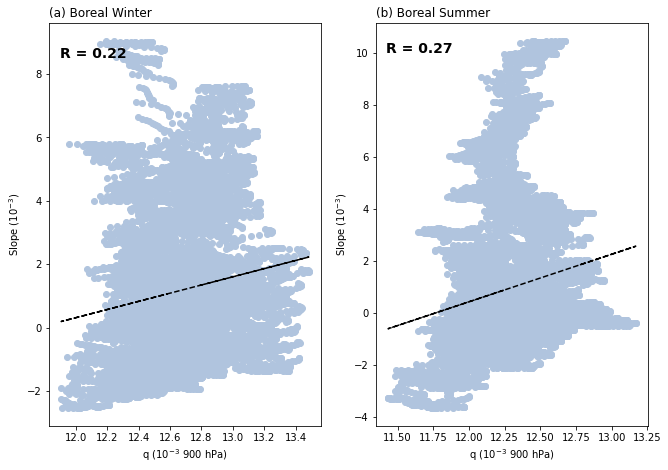

In [98]:
slo_roll = slo_3s.Slope.rolling(jump*24).mean().dropna()
slo_b_win = slo_roll[slo_roll.index.month.isin([12,1,2,3,4,5])]
sp_df_900 = sp_900[jump*24-1:35040].to_dataframe()
sp_900_b_win = sp_df_900[sp_df_900.index.month.isin([12,1,2,3,4,5])]

slo_b_sum = slo_roll[slo_roll.index.month.isin([6,7,8,9,10,11])]
sp_900_b_sum = sp_df_900[sp_df_900.index.month.isin([6,7,8,9,10,11])]

fig = plt.figure(figsize=(9,7)) #16,8
gs = gridspec.GridSpec(1,2, left=0.05, right=0.975, hspace=0.1, wspace=0.2, top=0.9, bottom=0.1, )

ax = plt.subplot(gs[0])
plt.scatter(sp_900_b_win.q*1e3, slo_b_win*1e3, color = 'lightsteelblue')
coef = np.polyfit(sp_900_b_win.q*1e3, slo_b_win*1e3,1) 
poly1d_fn = np.poly1d(coef)
plt.plot(sp_900_b_win.q*1e3, poly1d_fn(sp_900_b_win.q*1e3), '--k')
plt.text(11.9,8.5,'R = '+str(np.round(stats.spearmanr(sp_900_b_win.q.dropna(),
                                                       slo_b_win.dropna())[0],2)),
         fontsize = 14, fontweight = 'bold')
plt.xlabel('q (10$^{-3}$ 900 hPa)')
plt.ylabel('Slope (10$^{-3}$)')
plt.title('(a) Boreal Winter', loc = 'left')

ax = plt.subplot(gs[1])
plt.scatter(sp_900_b_sum.q*1e3, slo_b_sum*1e3, color = 'lightsteelblue')
coef = np.polyfit(sp_900_b_sum.q*1e3, slo_b_sum*1e3,1) 
poly1d_fn = np.poly1d(coef)
plt.plot(sp_900_b_sum.q*1e3, poly1d_fn(sp_900_b_sum.q*1e3), '--k')
plt.text(11.42,10,'R = '+str(np.round(stats.spearmanr(sp_900_b_sum.q.dropna(),
                                                       slo_b_sum.dropna())[0],2)),
         fontsize = 14, fontweight = 'bold')
plt.xlabel('q (10$^{-3}$ 900 hPa)')
plt.ylabel('Slope (10$^{-3}$)')
plt.title('(b) Boreal Summer', loc = 'left')

## 195-205

Text(0.0, 1.0, '(b) Boreal Summer')

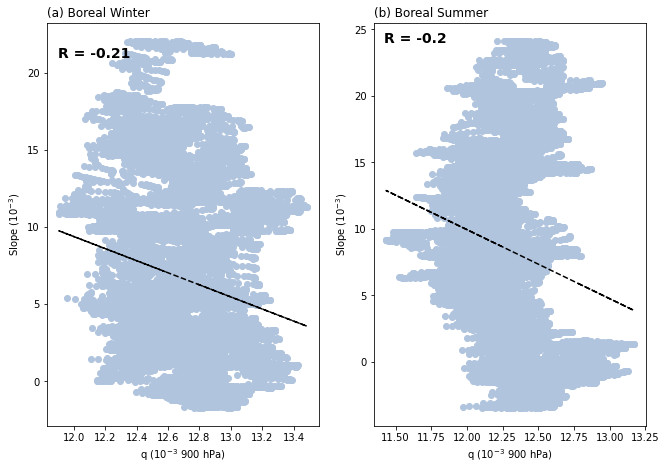

In [101]:
slo_roll = slo_195.Slope.rolling(jump*24).mean().dropna()
slo_b_win = slo_roll[slo_roll.index.month.isin([12,1,2,3,4,5])]
sp_df_900 = sp_900[jump*24-1:35040].to_dataframe()
sp_900_b_win = sp_df_900[sp_df_900.index.month.isin([12,1,2,3,4,5])]

slo_b_sum = slo_roll[slo_roll.index.month.isin([6,7,8,9,10,11])]
sp_900_b_sum = sp_df_900[sp_df_900.index.month.isin([6,7,8,9,10,11])]

fig = plt.figure(figsize=(9,7)) #16,8
gs = gridspec.GridSpec(1,2, left=0.05, right=0.975, hspace=0.1, wspace=0.2, top=0.9, bottom=0.1)

ax = plt.subplot(gs[0])
plt.scatter(sp_900_b_win.q*1e3, slo_b_win*1e3, color = 'lightsteelblue')
coef = np.polyfit(sp_900_b_win.q*1e3, slo_b_win*1e3,1) 
poly1d_fn = np.poly1d(coef)
plt.plot(sp_900_b_win.q*1e3, poly1d_fn(sp_900_b_win.q*1e3), '--k')
plt.text(11.9,21,'R = '+str(np.round(stats.spearmanr(sp_900_b_win.q.dropna(),
                                                       slo_b_win.dropna())[0],2)),
         fontsize = 14, fontweight = 'bold')
plt.xlabel('q (10$^{-3}$ 900 hPa)')
plt.ylabel('Slope (10$^{-3}$)')
plt.title('(a) Boreal Winter', loc = 'left')

ax = plt.subplot(gs[1])
plt.scatter(sp_900_b_sum.q*1e3, slo_b_sum*1e3, color = 'lightsteelblue')
coef = np.polyfit(sp_900_b_sum.q*1e3, slo_b_sum*1e3,1) 
poly1d_fn = np.poly1d(coef)
plt.plot(sp_900_b_sum.q*1e3, poly1d_fn(sp_900_b_sum.q*1e3), '--k')
plt.text(11.42,24,'R = '+str(np.round(stats.spearmanr(sp_900_b_sum.q.dropna(),
                                                       slo_b_sum.dropna())[0],2)),
         fontsize = 14, fontweight = 'bold')
plt.xlabel('q (10$^{-3}$ 900 hPa)')
plt.ylabel('Slope (10$^{-3}$)')
plt.title('(b) Boreal Summer', loc = 'left')

## 245-255

Text(0.0, 1.0, '(b) Boreal Summer')

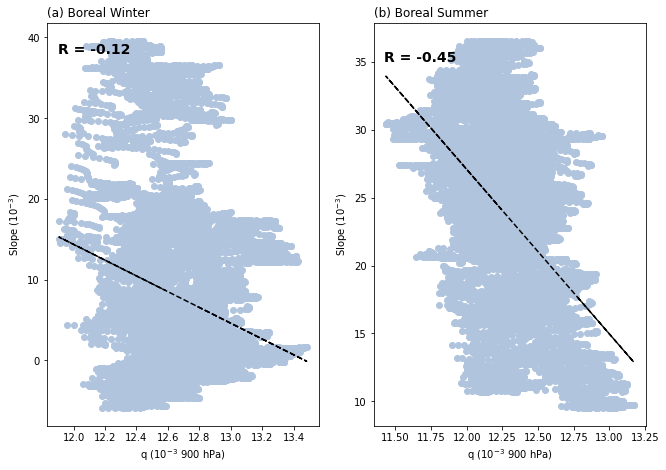

In [103]:
slo_roll = slo_245.Slope.rolling(jump*24).mean().dropna()
slo_b_win = slo_roll[slo_roll.index.month.isin([12,1,2,3,4,5])]
sp_df_900 = sp_900[jump*24-1:35040].to_dataframe()
sp_900_b_win = sp_df_900[sp_df_900.index.month.isin([12,1,2,3,4,5])]

slo_b_sum = slo_roll[slo_roll.index.month.isin([6,7,8,9,10,11])]
sp_900_b_sum = sp_df_900[sp_df_900.index.month.isin([6,7,8,9,10,11])]

fig = plt.figure(figsize=(9,7)) #16,8
gs = gridspec.GridSpec(1,2, left=0.05, right=0.975, hspace=0.1, wspace=0.2, top=0.9, bottom=0.1, )

ax = plt.subplot(gs[0])
plt.scatter(sp_900_b_win.q*1e3, slo_b_win*1e3, color = 'lightsteelblue')
coef = np.polyfit(sp_900_b_win.q*1e3, slo_b_win*1e3,1) 
poly1d_fn = np.poly1d(coef)
plt.plot(sp_900_b_win.q*1e3, poly1d_fn(sp_900_b_win.q*1e3), '--k')
plt.text(11.9,38,'R = '+str(np.round(stats.spearmanr(sp_900_b_win.q.dropna(),
                                                       slo_b_win.dropna())[0],2)),
         fontsize = 14, fontweight = 'bold')
plt.xlabel('q (10$^{-3}$ 900 hPa)')
plt.ylabel('Slope (10$^{-3}$)')
plt.title('(a) Boreal Winter', loc = 'left')

ax = plt.subplot(gs[1])
plt.scatter(sp_900_b_sum.q*1e3, slo_b_sum*1e3, color = 'lightsteelblue')
coef = np.polyfit(sp_900_b_sum.q*1e3, slo_b_sum*1e3,1) 
poly1d_fn = np.poly1d(coef)
plt.plot(sp_900_b_sum.q*1e3, poly1d_fn(sp_900_b_sum.q*1e3), '--k')
plt.text(11.42,35,'R = '+str(np.round(stats.spearmanr(sp_900_b_sum.q.dropna(),
                                                       slo_b_sum.dropna())[0],2)),
         fontsize = 14, fontweight = 'bold')
plt.xlabel('q (10$^{-3}$ 900 hPa)')
plt.ylabel('Slope (10$^{-3}$)')
plt.title('(b) Boreal Summer', loc = 'left')

# deseasonalized

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose

decom_sp = seasonal_decompose(sp_df_900.q, model='additive', period=12*30*24)
decom_slo = seasonal_decompose(slo_roll, model='additive', period=12*30*24)
deseason_sp = sp_df_900.q - decom_sp.seasonal
deseason_slo = slo_roll - decom_slo.seasonal

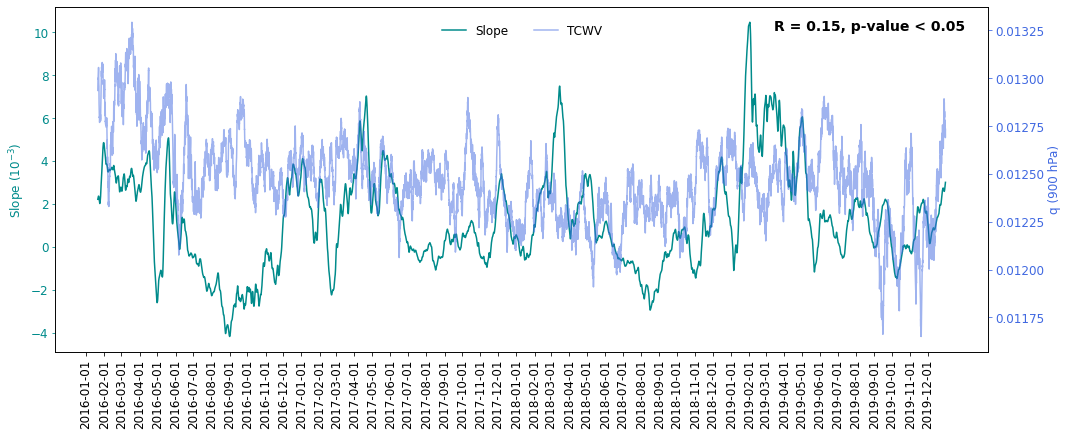

In [63]:
date = [d.strftime('%Y-%m') for d in pd.date_range('2016-01', '2020-01', freq = '1m')]
jump = 20
fig = plt.figure(figsize = (14,6))
gs = gridspec.GridSpec(1,1, left=0.05, right=0.975, hspace=0.45, wspace=0.4, top=0.9, bottom=0.1)
ax=subplot(gs[0])
ax.plot(deseason_slo.index.tolist(), np.array(slo_roll)*1e3, 
        label = 'Slope', color = 'darkcyan')
plt.legend(frameon=False, loc = 'upper center', bbox_to_anchor = (0.45,0.98), fontsize = 12)
plt.xticks(date, rotation = 90, fontsize = 12)
plt.ylabel('Slope (10$^{-3}$)', fontsize = 12, color = 'darkcyan')
plt.yticks(fontsize = 12)
ax.yaxis.label.set_color('darkcyan')
ax.tick_params(axis='y', colors = 'darkcyan')
ax2 = ax.twinx()
ax2.plot(deseason_slo.index.tolist(), np.array(deseason_sp), label = 'TCWV', 
         color = 'royalblue', alpha = 0.5)
plt.legend(frameon = False, bbox_to_anchor = (0.55,0.98), loc = 'upper center', fontsize = 12)
plt.xticks(date, rotation = 90, fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('q (900 hPa)', fontsize = 12, color = 'royalblue')
ax2.yaxis.label.set_color('royalblue')
ax2.tick_params(axis='y', colors = 'royalblue')
plt.text(slopes.index.tolist()[-7000],0.01325,
         'R = '+str(np.round(stats.spearmanr(deseason_sp/deseason_sp.std(),
          np.array(slo_roll))[0],2))+', p-value < 0.05',
         fontsize = 14, fontweight = 'bold')
plt.show()

# 800 hPa

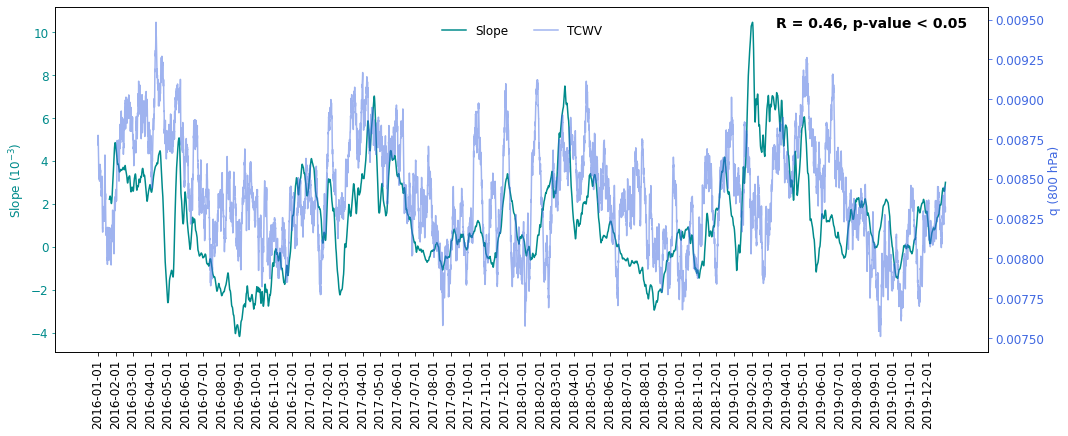

In [21]:
date = [d.strftime('%Y-%m') for d in pd.date_range('2016-01', '2020-01', freq = '1m')]
jump = 20
fig = plt.figure(figsize = (14,6))
gs = gridspec.GridSpec(1,1, left=0.05, right=0.975, hspace=0.45, wspace=0.4, top=0.9, bottom=0.1)
ax=subplot(gs[0])
ax.plot(slopes.index.tolist(), np.array(slopes.Slope.rolling(jump*24).mean())*1e3, 
        label = 'Slope', color = 'darkcyan')
plt.legend(frameon=False, loc = 'upper center', bbox_to_anchor = (0.45,0.98), fontsize = 12)
plt.xticks(date, rotation = 90, fontsize = 12)
plt.ylabel('Slope (10$^{-3}$)', fontsize = 12, color = 'darkcyan')
plt.yticks(fontsize = 12)
ax.yaxis.label.set_color('darkcyan')
ax.tick_params(axis='y', colors = 'darkcyan')
ax2 = ax.twinx()
ax2.plot(slopes.index.tolist(), np.array(sp_800[0:35040]), label = 'TCWV', color = 'royalblue', alpha = 0.5)
plt.legend(frameon = False, bbox_to_anchor = (0.55,0.98), loc = 'upper center', fontsize = 12)
plt.xticks(date, rotation = 90, fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('q (800 hPa)', fontsize = 12, color = 'royalblue')
ax2.yaxis.label.set_color('royalblue')
ax2.tick_params(axis='y', colors = 'royalblue')
plt.text(slopes.index.tolist()[-7000],0.00945, 
         'R = '+str(np.round(stats.spearmanr(sp_800[jump*24-1:35040]/sp_800.std(),
          np.array((slopes.Slope.rolling(jump*24).mean()).dropna()))[0],2))+', p-value < 0.05',
         fontsize = 14, fontweight = 'bold')
plt.show()

In [22]:
sp_df_800 = sp_800[jump*24-1:35040].to_dataframe()
decom_sp = seasonal_decompose(sp_df_800.q, model='additive', period=12*30*24)
decom_slo = seasonal_decompose(slo_roll, model='additive', period=12*30*24)
deseason_sp = sp_df_800.q - decom_sp.seasonal
deseason_slo = slo_roll - decom_slo.seasonal

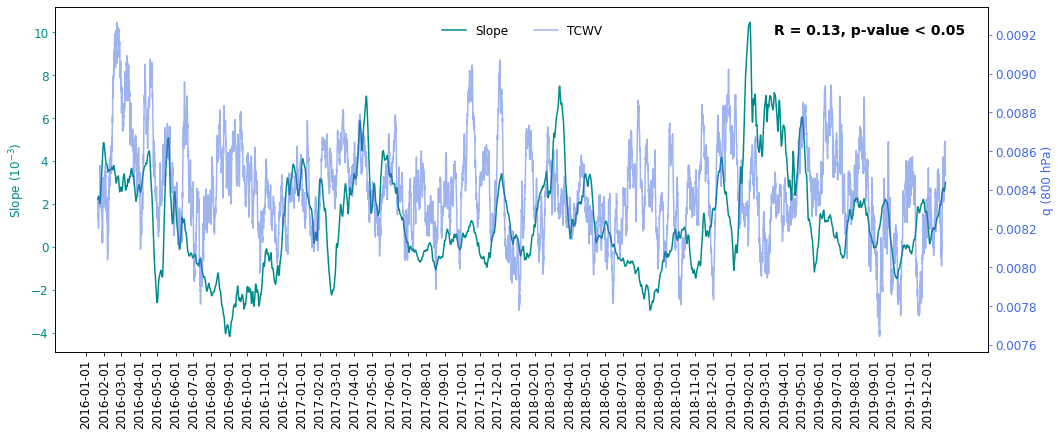

In [23]:
date = [d.strftime('%Y-%m') for d in pd.date_range('2016-01', '2020-01', freq = '1m')]
jump = 20
fig = plt.figure(figsize = (14,6))
gs = gridspec.GridSpec(1,1, left=0.05, right=0.975, hspace=0.45, wspace=0.4, top=0.9, bottom=0.1)
ax=subplot(gs[0])
ax.plot(deseason_slo.index.tolist(), np.array(slo_roll)*1e3, 
        label = 'Slope', color = 'darkcyan')
plt.legend(frameon=False, loc = 'upper center', bbox_to_anchor = (0.45,0.98), fontsize = 12)
plt.xticks(date, rotation = 90, fontsize = 12)
plt.ylabel('Slope (10$^{-3}$)', fontsize = 12, color = 'darkcyan')
plt.yticks(fontsize = 12)
ax.yaxis.label.set_color('darkcyan')
ax.tick_params(axis='y', colors = 'darkcyan')
ax2 = ax.twinx()
ax2.plot(deseason_slo.index.tolist(), np.array(deseason_sp), label = 'TCWV', 
         color = 'royalblue', alpha = 0.5)
plt.legend(frameon = False, bbox_to_anchor = (0.55,0.98), loc = 'upper center', fontsize = 12)
plt.xticks(date, rotation = 90, fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('q (800 hPa)', fontsize = 12, color = 'royalblue')
ax2.yaxis.label.set_color('royalblue')
ax2.tick_params(axis='y', colors = 'royalblue')
plt.text(slopes.index.tolist()[-7000],0.0092,
         'R = '+str(np.round(stats.spearmanr(deseason_sp/deseason_sp.std(),
          np.array(slo_roll))[0],2))+', p-value < 0.05',
         fontsize = 14, fontweight = 'bold')
plt.show()

# 700 hPa

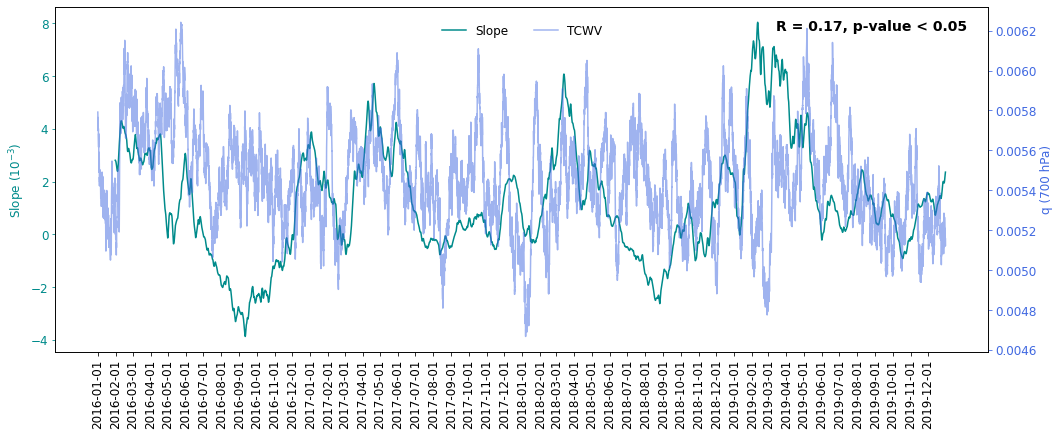

In [24]:
date = [d.strftime('%Y-%m') for d in pd.date_range('2016-01', '2020-01', freq = '1m')]
jump = 30
fig = plt.figure(figsize = (14,6))
gs = gridspec.GridSpec(1,1, left=0.05, right=0.975, hspace=0.45, wspace=0.4, top=0.9, bottom=0.1)
ax=subplot(gs[0])
ax.plot(slopes.index.tolist(), np.array(slopes.Slope.rolling(jump*24).mean())*1e3, 
        label = 'Slope', color = 'darkcyan')
plt.legend(frameon=False, loc = 'upper center', bbox_to_anchor = (0.45,0.98), fontsize = 12)
plt.xticks(date, rotation = 90, fontsize = 12)
plt.ylabel('Slope (10$^{-3}$)', fontsize = 12, color = 'darkcyan')
plt.yticks(fontsize = 12)
ax.yaxis.label.set_color('darkcyan')
ax.tick_params(axis='y', colors = 'darkcyan')
ax2 = ax.twinx()
ax2.plot(slopes.index.tolist(), np.array(sp_700[0:35040]), label = 'TCWV', color = 'royalblue', alpha = 0.5)
plt.legend(frameon = False, bbox_to_anchor = (0.55,0.98), loc = 'upper center', fontsize = 12)
plt.xticks(date, rotation = 90, fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('q (700 hPa)', fontsize = 12, color = 'royalblue')
ax2.yaxis.label.set_color('royalblue')
ax2.tick_params(axis='y', colors = 'royalblue')
plt.text(slopes.index.tolist()[-7000],0.0062, 
         'R = '+str(np.round(stats.spearmanr(sp_700[jump*24-1:35040]/sp_700.std(),
          np.array((slopes.Slope.rolling(jump*24).mean()).dropna()))[0],2))+', p-value < 0.05',
         fontsize = 14, fontweight = 'bold')
plt.show()

# 600 hPa

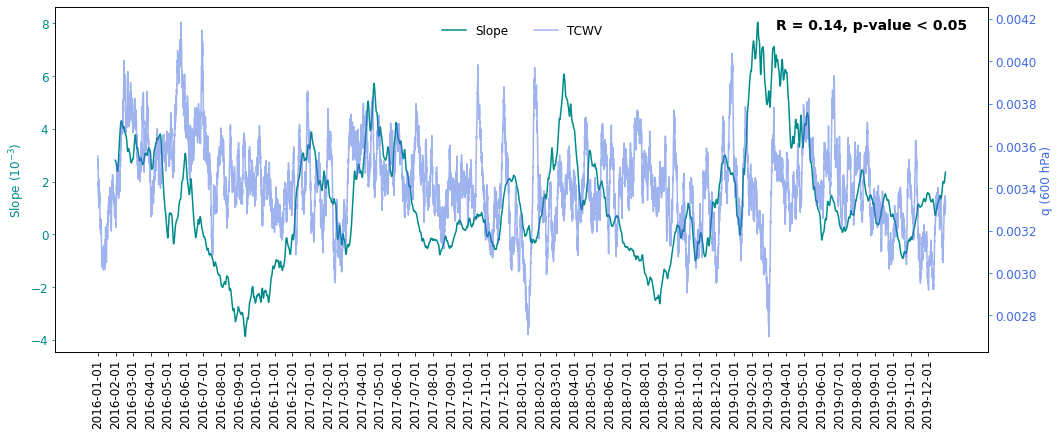

In [104]:
date = [d.strftime('%Y-%m') for d in pd.date_range('2016-01', '2020-01', freq = '1m')]
jump = 30
fig = plt.figure(figsize = (14,6))
gs = gridspec.GridSpec(1,1, left=0.05, right=0.975, hspace=0.45, wspace=0.4, top=0.9, bottom=0.1)
ax=subplot(gs[0])
ax.plot(slopes.index.tolist(), np.array(slopes.Slope.rolling(30*24).mean())*1e3, 
        label = 'Slope', color = 'darkcyan')
plt.legend(frameon=False, loc = 'upper center', bbox_to_anchor = (0.45,0.98), fontsize = 12)
plt.xticks(date, rotation = 90, fontsize = 12)
plt.ylabel('Slope (10$^{-3}$)', fontsize = 12, color = 'darkcyan')
plt.yticks(fontsize = 12)
ax.yaxis.label.set_color('darkcyan')
ax.tick_params(axis='y', colors = 'darkcyan')
ax2 = ax.twinx()
ax2.plot(slopes.index.tolist(), np.array(sp_600[0:35040]), label = 'TCWV', color = 'royalblue', alpha = 0.5)
plt.legend(frameon = False, bbox_to_anchor = (0.55,0.98), loc = 'upper center', fontsize = 12)
plt.xticks(date, rotation = 90, fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('q (600 hPa)', fontsize = 12, color = 'royalblue')
ax2.yaxis.label.set_color('royalblue')
ax2.tick_params(axis='y', colors = 'royalblue')
plt.text(slopes.index.tolist()[-7000],0.00415, 
         'R = '+str(np.round(stats.spearmanr(sp_600[jump*24-1:35040]/sp_600.std(),
          np.array((slopes.Slope.rolling(jump*24).mean()).dropna()))[0],2))+', p-value < 0.05',
         fontsize = 14, fontweight = 'bold')
plt.show()

Text(0.0, 1.0, '(b) Boreal Summer')

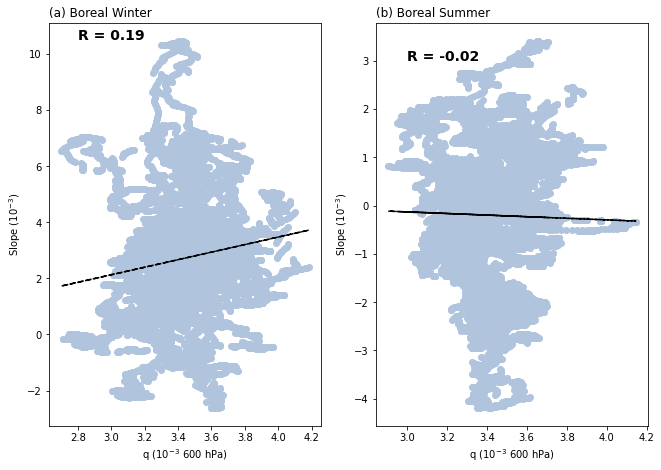

In [123]:
slo_roll = slopes.Slope.rolling(jump*24).mean().dropna()
slo_b_win = slo_roll[slo_roll.index.month.isin([12,1,2,3,4,5])]
sp_df_600 = sp_600[jump*24-1:35040].to_dataframe()
sp_600_b_win = sp_df_600[sp_df_600.index.month.isin([12,1,2,3,4,5])]

slo_b_sum = slo_roll[slo_roll.index.month.isin([6,7,8,9,10,11])]
sp_600_b_sum = sp_df_600[sp_df_600.index.month.isin([6,7,8,9,10,11])]

fig = plt.figure(figsize=(9,7)) #16,8
gs = gridspec.GridSpec(1,2, left=0.05, right=0.975, hspace=0.1, wspace=0.2, top=0.9, bottom=0.1, )

ax = plt.subplot(gs[0])
plt.scatter(sp_600_b_win.q*1e3, slo_b_win*1e3, color = 'lightsteelblue')
coef = np.polyfit(sp_600_b_win.q*1e3, slo_b_win*1e3,1) 
poly1d_fn = np.poly1d(coef)
plt.plot(sp_600_b_win.q*1e3, poly1d_fn(sp_600_b_win.q*1e3), '--k')
plt.text(2.8,10.5,'R = '+str(np.round(stats.spearmanr(sp_600_b_win.q.dropna(),
                                                       slo_b_win.dropna())[0],2)),
         fontsize = 14, fontweight = 'bold')
plt.xlabel('q (10$^{-3}$ 600 hPa)')
plt.ylabel('Slope (10$^{-3}$)')
plt.title('(a) Boreal Winter', loc = 'left')

ax = plt.subplot(gs[1])
plt.scatter(sp_600_b_sum.q*1e3, slo_b_sum*1e3, color = 'lightsteelblue')
coef = np.polyfit(sp_600_b_sum.q*1e3, slo_b_sum*1e3,1) 
poly1d_fn = np.poly1d(coef)
plt.plot(sp_600_b_sum.q*1e3, poly1d_fn(sp_600_b_sum.q*1e3), '--k')
plt.text(3,3,'R = '+str(np.round(stats.spearmanr(sp_600_b_sum.q.dropna(),
                                                       slo_b_sum.dropna())[0],2)),
         fontsize = 14, fontweight = 'bold')
plt.xlabel('q (10$^{-3}$ 600 hPa)')
plt.ylabel('Slope (10$^{-3}$)')
plt.title('(b) Boreal Summer', loc = 'left')

In [ ]:
np.round(stats.spearmanr(sp_600[jump*24-1:35040]/sp_600.std(),
               np.array((slopes.Slope.rolling(jump*24).mean()/slopes.Slope.std()).dropna())),2)

# 500 hPa

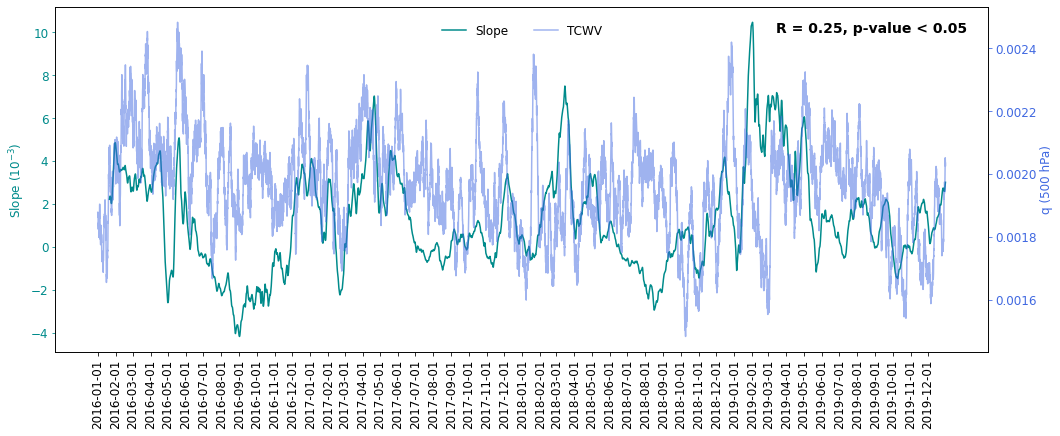

In [114]:
date = [d.strftime('%Y-%m') for d in pd.date_range('2016-01', '2020-01', freq = '1m')]
jump = 20
fig = plt.figure(figsize = (14,6))
gs = gridspec.GridSpec(1,1, left=0.05, right=0.975, hspace=0.45, wspace=0.4, top=0.9, bottom=0.1)
ax=subplot(gs[0])
ax.plot(slopes.index.tolist(), np.array(slopes.Slope.rolling(jump*24).mean())*1e3, 
        label = 'Slope', color = 'darkcyan')
plt.legend(frameon=False, loc = 'upper center', bbox_to_anchor = (0.45,0.98), fontsize = 12)
plt.xticks(date, rotation = 90, fontsize = 12)
plt.ylabel('Slope (10$^{-3}$)', fontsize = 12, color = 'darkcyan')
plt.yticks(fontsize = 12)
ax.yaxis.label.set_color('darkcyan')
ax.tick_params(axis='y', colors = 'darkcyan')
ax2 = ax.twinx()
ax2.plot(slopes.index.tolist(), np.array(sp_500[0:35040]), label = 'TCWV', color = 'royalblue', alpha = 0.5)
plt.legend(frameon = False, bbox_to_anchor = (0.55,0.98), loc = 'upper center', fontsize = 12)
plt.xticks(date, rotation = 90, fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('q (500 hPa)', fontsize = 12, color = 'royalblue')
ax2.yaxis.label.set_color('royalblue')
ax2.tick_params(axis='y', colors = 'royalblue')
plt.text(slopes.index.tolist()[-7000],0.00245,'R = '+str(np.round(stats.spearmanr(sp_500[jump*24-1:35040]/sp_500.std(),
          np.array((slopes.Slope.rolling(jump*24).mean()).dropna()))[0],2))+', p-value < 0.05',
         fontsize = 14, fontweight = 'bold')
plt.show()

Text(0.0, 1.0, '(b) Boreal Summer')

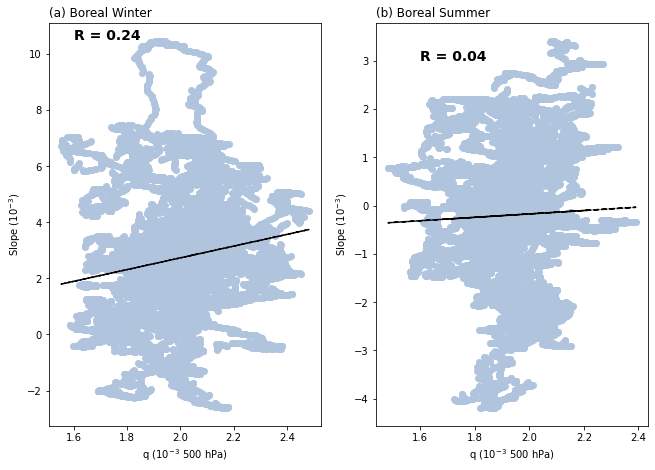

In [127]:
slo_roll = slopes.Slope.rolling(jump*24).mean().dropna()
slo_b_win = slo_roll[slo_roll.index.month.isin([12,1,2,3,4,5])]
sp_df_500 = sp_500[jump*24-1:35040].to_dataframe()
sp_500_b_win = sp_df_500[sp_df_500.index.month.isin([12,1,2,3,4,5])]

slo_b_sum = slo_roll[slo_roll.index.month.isin([6,7,8,9,10,11])]
sp_500_b_sum = sp_df_500[sp_df_500.index.month.isin([6,7,8,9,10,11])]

fig = plt.figure(figsize=(9,7)) #16,8
gs = gridspec.GridSpec(1,2, left=0.05, right=0.975, hspace=0.1, wspace=0.2, top=0.9, bottom=0.1, )

ax = plt.subplot(gs[0])
plt.scatter(sp_500_b_win.q*1e3, slo_b_win*1e3, color = 'lightsteelblue')
coef = np.polyfit(sp_500_b_win.q*1e3, slo_b_win*1e3,1) 
poly1d_fn = np.poly1d(coef)
plt.plot(sp_500_b_win.q*1e3, poly1d_fn(sp_500_b_win.q*1e3), '--k')
plt.text(1.6,10.5,'R = '+str(np.round(stats.spearmanr(sp_500_b_win.q.dropna(),
                                                       slo_b_win.dropna())[0],2)),
         fontsize = 14, fontweight = 'bold')
plt.xlabel('q (10$^{-3}$ 500 hPa)')
plt.ylabel('Slope (10$^{-3}$)')
plt.title('(a) Boreal Winter', loc = 'left')

ax = plt.subplot(gs[1])
plt.scatter(sp_500_b_sum.q*1e3, slo_b_sum*1e3, color = 'lightsteelblue')
coef = np.polyfit(sp_500_b_sum.q*1e3, slo_b_sum*1e3,1) 
poly1d_fn = np.poly1d(coef)
plt.plot(sp_500_b_sum.q*1e3, poly1d_fn(sp_500_b_sum.q*1e3), '--k')
plt.text(1.6,3,'R = '+str(np.round(stats.spearmanr(sp_500_b_sum.q.dropna(),
                                                       slo_b_sum.dropna())[0],2)),
         fontsize = 14, fontweight = 'bold')
plt.xlabel('q (10$^{-3}$ 500 hPa)')
plt.ylabel('Slope (10$^{-3}$)')
plt.title('(b) Boreal Summer', loc = 'left')

In [ ]:
np.round(stats.spearmanr(sp_500[jump*24-1:35040]/sp_500.std(),
               np.array((slopes.Slope.rolling(jump*24).mean()/slopes.Slope.std()).dropna())),2)

# 400 hPa

In [ ]:
date = [d.strftime('%Y-%m') for d in pd.date_range('2016-01', '2020-01', freq = '1m')]
jump = 30
fig = plt.figure(figsize = (14,6))
gs = gridspec.GridSpec(1,1, left=0.05, right=0.975, hspace=0.45, wspace=0.4, top=0.9, bottom=0.1)
ax=subplot(gs[0])
ax.plot(slopes.index.tolist(), np.array(slopes.Slope.rolling(30*24).mean())*1e3, 
        label = 'Slope', color = 'darkcyan')
plt.legend(frameon=False, loc = 'upper center', bbox_to_anchor = (0.45,0.98), fontsize = 12)
plt.xticks(date, rotation = 90, fontsize = 12)
plt.ylabel('Slope (10$^{-3}$)', fontsize = 12, color = 'darkcyan')
plt.yticks(fontsize = 12)
ax.yaxis.label.set_color('darkcyan')
ax.tick_params(axis='y', colors = 'darkcyan')
ax2 = ax.twinx()
ax2.plot(slopes.index.tolist(), np.array(sp_400[0:35040]), label = 'TCWV', color = 'royalblue', alpha = 0.5)
plt.legend(frameon = False, bbox_to_anchor = (0.55,0.98), loc = 'upper center', fontsize = 12)
plt.xticks(date, rotation = 90, fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('q (400 hPa)', fontsize = 12, color = 'royalblue')
ax2.yaxis.label.set_color('royalblue')
ax2.tick_params(axis='y', colors = 'royalblue')
plt.text('2019-04-01',0.00118,'R = '+str(np.round(stats.spearmanr(sp_400[jump*24-1:35040]/sp_400.std(),
          np.array((slopes.Slope.rolling(jump*24).mean()).dropna()))[0],2))+', p-value < 0.05',
         fontsize = 14, fontweight = 'bold')
plt.show()

In [ ]:
np.round(stats.spearmanr(sp_400[jump*24-1:35040]/sp_400.std(),
               np.array((slopes.Slope.rolling(jump*24).mean()/slopes.Slope.std()).dropna())),2)